<a href="https://colab.research.google.com/github/rkdxofkd/after_like/blob/main/%EC%A0%9C%EC%B6%9C%EC%9A%A9%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%ACing.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 4.4 MB/s 
     |████████████████████████████████| 303 kB 44.3 MB/s 
     |████████████████████████████████| 3.1 MB 9.9 MB/s 
     |████████████████████████████████| 690 kB 39.9 MB/s 
     |████████████████████████████████| 102 kB 10.7 MB/s 
     |████████████████████████████████| 62 kB 952 kB/s 
     |████████████████████████████████| 296 kB 51.0 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=d1b41a35638bd868adeed91ad6692ab969e0d8039898023fb2990f898ce2d636
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing install

In [2]:
import pandas as pd

# target
target = 'vacc_h1n1_f'


# train, test data
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')


# submission form
sample_submission = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv')

In [3]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(
    train, train_size=0.80, test_size=0.20, stratify=train[target], random_state=2
)

In [27]:
# 백신을 맞았다는 대답은 총 33723명 중 8062명이 했다
train['vacc_h1n1_f'].sum()
#len(train)

33723

In [138]:
train[train['agegrp'].isnull()]['vacc_h1n1_f'].sum()

0

In [103]:
train[train['health_worker']==1]['vacc_h1n1_f'].mean()

0.4106529209621993

In [146]:
train['state'].value_counts()

CALIFORNIA             829
TEXAS                  825
NEW MEXICO             814
VIRGINIA               780
MARYLAND               774
ILLINOIS               769
GEORGIA                763
DISTRICTOF COLUMBIA    742
FLORIDA                741
ARIZONA                730
MISSISSIPPI            730
UTAH                   713
LOUISIANA              710
NEW YORK               708
ALASKA                 697
NEW JERSEY             688
ALABAMA                678
COLORADO               678
WASHINGTON             676
NORTH CAROLINA         673
WYOMING                672
INDIANA                669
NEVADA                 668
DELAWARE               656
IDAHO                  655
KANSAS                 652
OREGON                 650
ARKANSAS               649
NEBRASKA               649
MASSACHUSETTS          643
IOWA                   635
SOUTH CAROLINA         630
RHODE ISLAND           626
OHIO                   620
CONNECTICUT            619
VERMONT                618
TENNESSEE              615
O

In [145]:
train[train['vacc_h1n1_f']==1]['state'].value_counts()

RHODE ISLAND           229
MASSACHUSETTS          219
VIRGINIA               218
CALIFORNIA             203
NEW MEXICO             196
MARYLAND               194
UTAH                   186
ARIZONA                184
SOUTH DAKOTA           183
IOWA                   182
NEBRASKA               180
MAINE                  174
ALASKA                 173
HAWAII                 172
VERMONT                171
ILLINOIS               171
TEXAS                  170
KANSAS                 169
WASHINGTON             169
DISTRICTOF COLUMBIA    169
WYOMING                167
MINNESOTA              167
ARKANSAS               163
COLORADO               162
INDIANA                160
NORTH CAROLINA         158
NEVADA                 155
OREGON                 151
DELAWARE               150
NEW YORK               149
NEW HAMPSHIRE          149
NEW JERSEY             149
FLORIDA                148
OHIO                   141
CONNECTICUT            141
ALABAMA                140
TENNESSEE              140
P

In [ ]:
train[train['vacc_h1n1_f']==0]['opinion_h1n1_vacc_effective'].value_counts()

In [131]:
def encyclopedia(x):
  print(f"결측치 중 1값:{train[train[x].isnull()]['vacc_h1n1_f'].sum()}")
  print(f"결측치 중 평균값: {(train[train[x].isnull()]['vacc_h1n1_f'].sum())/len(train[train[x].isnull()])}"
)



In [128]:
len(train[train['opinion_h1n1_vacc_effective'].isnull()])

7086

In [132]:
encyclopedia('opinion_h1n1_vacc_effective')

결측치 중 1값:2406
결측치 중 평균값: 0.33954276037256564


In [28]:
train.isnull().sum()

h1n1_concern                    6790
h1n1_knowledge                  6790
behavioral_antiviral_meds       6870
behavioral_avoidance            6992
behavioral_face_mask            6810
behavioral_wash_hands           6829
behavioral_large_gatherings     6857
behavioral_outside_home         6872
behavioral_touch_face           6928
doctor_recc_h1n1                1488
doctor_recc_seasonal            1488
chronic_med_condition           1075
child_under_6_months            7617
health_insurance               15505
health_worker                   7603
opinion_h1n1_vacc_effective     7086
opinion_h1n1_risk               7121
opinion_h1n1_sick_from_vacc     7155
opinion_seas_vacc_effective     7204
opinion_seas_risk               7257
opinion_seas_sick_from_vacc     7310
agegrp                             0
education_comp                  8183
raceeth4_i                         0
sex_i                              0
inc_pov                            0
marital                         8199
r

In [77]:
train[train['chronic_med_condition']==1]['chronic_med_condition'].mode()[0]

1.0

In [6]:
#프로파일을 통해서 하나씩 각자 비율을 찾아보고 nan값의 1은 몇개가 있는지 찾아보자 
from pandas_profiling import ProfileReport

profile = ProfileReport(train, minimal=False)
profile

h1n1_concern                    4
h1n1_knowledge                  3
behavioral_antiviral_meds       2
behavioral_avoidance            2
behavioral_face_mask            2
behavioral_wash_hands           2
behavioral_large_gatherings     2
behavioral_outside_home         2
behavioral_touch_face           2
doctor_recc_h1n1                2
doctor_recc_seasonal            2
chronic_med_condition           2
child_under_6_months            2
health_insurance                2
health_worker                   2
opinion_h1n1_vacc_effective     6
opinion_h1n1_risk               6
opinion_h1n1_sick_from_vacc     6
opinion_seas_vacc_effective     6
opinion_seas_risk               6
opinion_seas_sick_from_vacc     6
agegrp                          7
education_comp                  4
raceeth4_i                      4
sex_i                           2
inc_pov                         4
marital                         2
rent_own_r                      4
employment_status               3
census_region 

In [104]:
train[train['opinion_h1n1_vacc_effective']==1]['vacc_h1n1_f'].mean()

nan

In [4]:
train.describe(exclude="number").T.sort_values(by="unique", ascending= False)

,count,unique,top,freq
state,33723,51,CALIFORNIA,829
employment_occupation,13714,25,Management Occupations,1769
employment_industry,13714,23,Health Care and Social Assistance Industries,2451
agegrp,33723,7,65+ Years,6821
opinion_h1n1_vacc_effective,26637,6,Somewhat Effective,11710
opinion_h1n1_risk,26602,6,Somewhat Low,9980
opinion_h1n1_sick_from_vacc,26568,6,Not Very Worried,9229
opinion_seas_vacc_effective,26519,6,Somewhat Effective,11571
opinion_seas_risk,26466,6,Somewhat Low,9057
opinion_seas_sick_from_vacc,26413,6,Not At All Worried,11813


In [ ]:
train.dtypes

In [5]:
train.isnull().sum()

h1n1_concern                    6790
h1n1_knowledge                  6790
behavioral_antiviral_meds       6870
behavioral_avoidance            6992
behavioral_face_mask            6810
behavioral_wash_hands           6829
behavioral_large_gatherings     6857
behavioral_outside_home         6872
behavioral_touch_face           6928
doctor_recc_h1n1                1488
doctor_recc_seasonal            1488
chronic_med_condition           1075
child_under_6_months            7617
health_insurance               15505
health_worker                   7603
opinion_h1n1_vacc_effective     7086
opinion_h1n1_risk               7121
opinion_h1n1_sick_from_vacc     7155
opinion_seas_vacc_effective     7204
opinion_seas_risk               7257
opinion_seas_sick_from_vacc     7310
agegrp                             0
education_comp                  8183
raceeth4_i                         0
sex_i                              0
inc_pov                            0
marital                         8199
r

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
train[train['doctor_recc_h1n1'].isnull()]


In [62]:
def nan(a):
  result= train[train[a]==1][a].mode()[0]
  return result
def nani(a):
  result= train[train[a]==0][a].mode()[0]
  return result

In [ ]:
def engineer_fillna(df):

  # 결측치 처리.
  dels = [col for col in df.columns if ("employment" in col or "health_insurance" in col
                                        or "household_children" in col or "n_adult_r" in col
                                        '')]

  df.fillna({
            'h1n1_concern':nan('h1n1_concern'),
            'h1n1_knowledge': nan('h1n1_knowledge'),
            'behavioral_antiviral_meds': nan('behavioral_antiviral_meds'),
            'behavioral_avoidance': nan('behavioral_avoidance'),
            'behavioral_face_mask': nan('behavioral_face_mask'),
            'behavioral_wash_hands': nan('behavioral_wash_hands'),
            'behavioral_large_gatherings': nan('behavioral_large_gatherings'),
            'behavioral_outside_home': nan('behavioral_outside_home'),
            'behavioral_touch_face': nan('behavioral_touch_face'),
            'behavioral_avoidance': nan('behavioral_avoidance'),
            'doctor_recc_h1n1':nani('doctor_recc_h1n1'),
            'doctor_recc_seasonal':nani('doctor_recc_seasonal'),
            'child_under_6_months':nan('child_under_6_months'),
            'health_insurance':nani('health_insurance'),
            'health_worker':nani('health_worker'),
             ''



             }
              inplace=True)
  df.drop(columns=dels, inplace=True)

In [5]:
import numpy as np


def engineer_1(df):
    """특성을 엔지니어링 하는 함수입니다."""

    # 높은 카디널리티를 가지는 특성을 제거합니다(state feature제거).
    selected_cols = df.select_dtypes(include=["number", "object"])
    labels = selected_cols.nunique()  # 특성별 카디널리티 리스트
    selected_features = labels[labels <= 30].index.tolist()  # 카디널리티가 30보다 작은 특성만 선택합니다.
    df = df[selected_features]

    # 새로운 특성을 생성합니다.
    behaviorals_0 = ['behavioral_antiviral_meds', 'behavioral_face_mask', 'behavioral_large_gatherings',
                    'behavioral_outside_home' ]
    behaciorals_1 = ['behavioral_avoidance', 'behavioral_wash_hands', 'behavioral_touch_face']
    df["behaviorals_0"] = df[behaviorals_0].sum(axis=1)
    df["behaciorals_1"] = df[behaciorals_1].sum(axis=1)



    return df


train = engineer_1(train)
val = engineer_1(val)
test = engineer_1(test)

In [14]:
#상식과 걱정의 상관관계
data1 = train[['h1n1_concern', 'h1n1_knowledge']].dropna()

In [15]:
data1

,h1n1_concern,h1n1_knowledge
20365,1.0,1.0
29138,1.0,1.0
36128,2.0,2.0
39793,2.0,1.0
32973,0.0,1.0
...,...,...
14173,2.0,1.0
9193,3.0,1.0
34753,0.0,2.0
4412,3.0,2.0


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력

from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

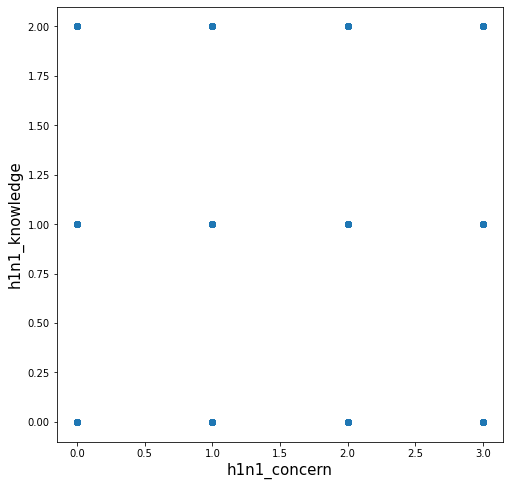

In [22]:
## 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

font_size = 15
plt.scatter(data1['h1n1_concern'],data1['h1n1_knowledge']) ## 원 데이터 산포도
 
plt.xlabel('h1n1_concern', fontsize=font_size)
plt.ylabel('h1n1_knowledge',fontsize=font_size)
plt.show()

In [23]:
x_h1n1= train['doctor_recc_h1n1'].dropna()
x_sea= train['doctor_recc_seasonal'].dropna()

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(x_h1n1, x_sea)

In [12]:
train['agegrp'].value_counts()

65+ Years             6821
55 - 64 Years         5564
45 - 54 Years         5332
18 - 34 Years         5224
35 - 44 Years         3992
6 Months - 9 Years    3480
10 - 17 Years         3310
Name: agegrp, dtype: int64

In [11]:
train.groupby('agegrp')['vacc_h1n1_f'].sum()



agegrp
10 - 17 Years         1006
18 - 34 Years         1004
35 - 44 Years          827
45 - 54 Years         1019
55 - 64 Years         1325
6 Months - 9 Years    1343
65+ Years             1538
Name: vacc_h1n1_f, dtype: int64

In [75]:
nani('doctor_recc_h1n1')

0.0